# Create Plots of Performance Metrics
This is a python program that create performance plots using matplotlib
reading metrics from the performance metric file in
   /home/HYDROAPP/common/performance/log_artificats.csv


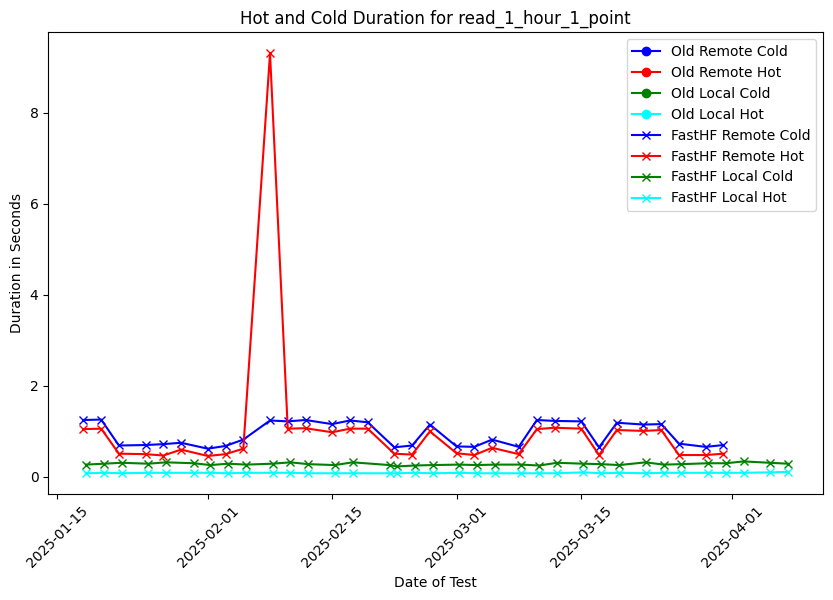

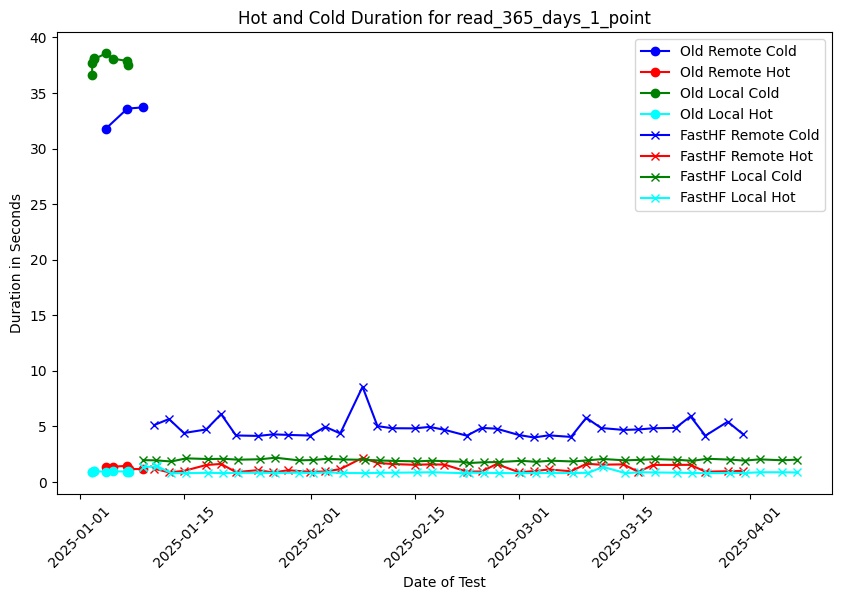

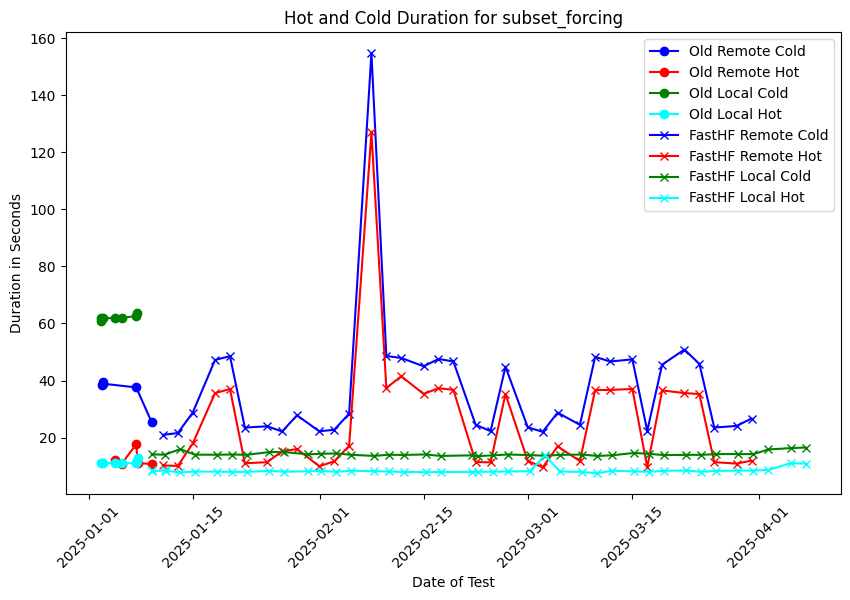

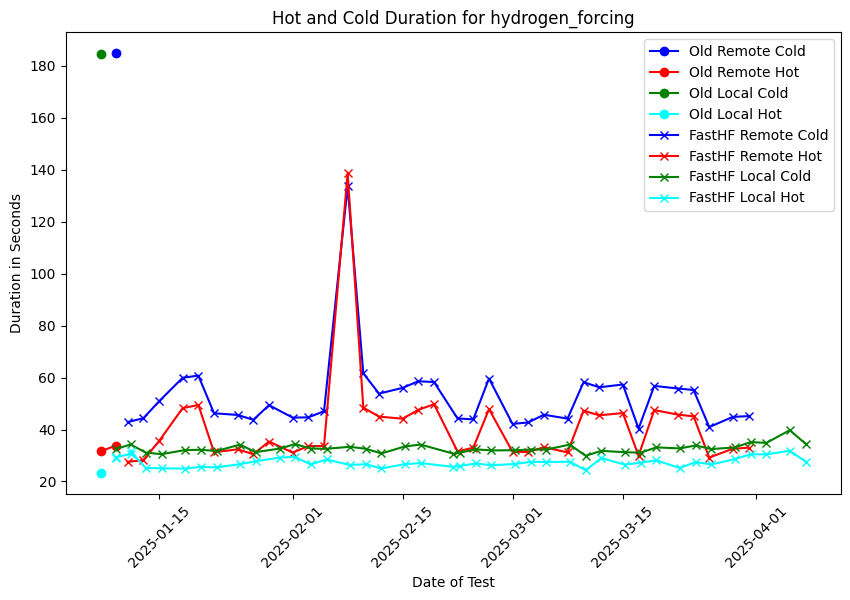

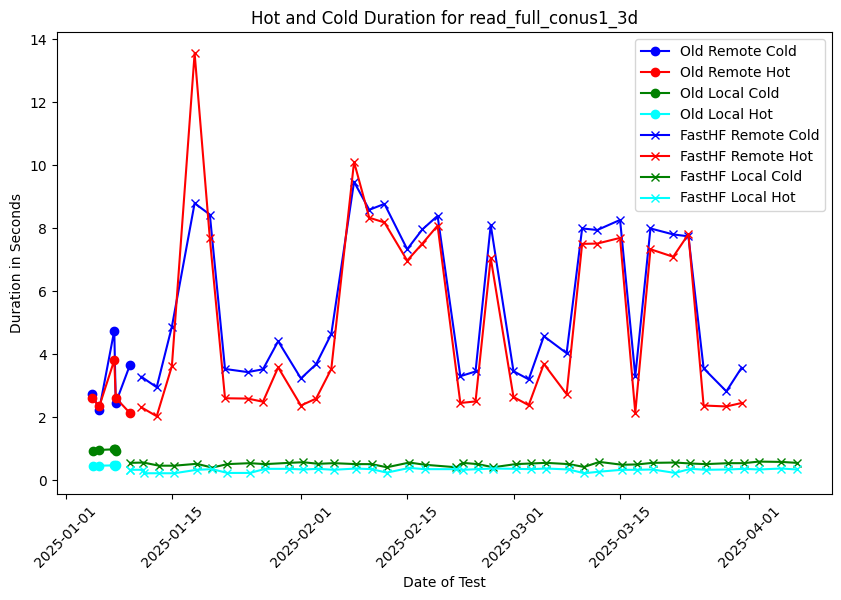

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_scenario(scenario_name):
    """Plot graphs related to the scenario name."""

    log_artificats_path = "/home/HYDROAPP/common/performance/log_artifact.csv"

    df = pd.read_csv(log_artificats_path)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d:%H:%M:%S')

    oldhf_df = df[df['hf_hydrodata_version'].isin (["1.3.14", "1.3.16"])]
    fasthf_df = df[~df['hf_hydrodata_version'].isin (["1.3.14", "1.3.16"])]

    oldhf_scenario_df = oldhf_df[oldhf_df['scenario'] == scenario_name]
    fasthf_scenario_df = fasthf_df[fasthf_df['scenario'] == scenario_name]
    old_remote_df = oldhf_scenario_df[oldhf_scenario_df['remotelocal'] == 'remote']
    old_local_df = oldhf_scenario_df[oldhf_scenario_df['remotelocal'] == 'local']
    old_remote_cold_df = old_remote_df[old_remote_df['hotcold'] == 'cold']
    old_remote_hot_df = old_remote_df[old_remote_df['hotcold'] == 'hot']
    old_local_cold_df = old_local_df[old_local_df['hotcold'] == 'cold']
    old_local_hot_df = old_local_df[old_local_df['hotcold'] == 'hot']

    fasthf_remote_df = fasthf_scenario_df[fasthf_scenario_df['remotelocal'] == 'remote']
    fasthf_local_df = fasthf_scenario_df[fasthf_scenario_df['remotelocal'] == 'local']
    fasthf_remote_cold_df = fasthf_remote_df[fasthf_remote_df['hotcold'] == 'cold']
    fasthf_remote_hot_df = fasthf_remote_df[fasthf_remote_df['hotcold'] == 'hot']
    fasthf_local_cold_df = fasthf_local_df[fasthf_local_df['hotcold'] == 'cold']
    fasthf_local_hot_df = fasthf_local_df[fasthf_local_df['hotcold'] == 'hot']

    plt.figure(figsize=(10, 6))

    plt.plot(old_remote_cold_df['date'], old_remote_cold_df['duration'], label='Old Remote Cold', color='blue', marker='o')
    plt.plot(old_remote_hot_df['date'], old_remote_hot_df['duration'], label='Old Remote Hot', color='red', marker='o')
    plt.plot(old_local_cold_df['date'], old_local_cold_df['duration'], label='Old Local Cold', color='green', marker='o')
    plt.plot(old_local_hot_df['date'], old_local_hot_df['duration'], label='Old Local Hot', color='cyan', marker='o')

    plt.plot(fasthf_remote_cold_df['date'], fasthf_remote_cold_df['duration'], label='FastHF Remote Cold', color='blue', marker='x')
    plt.plot(fasthf_remote_hot_df['date'], fasthf_remote_hot_df['duration'], label='FastHF Remote Hot', color='red', marker='x')
    plt.plot(fasthf_local_cold_df['date'], fasthf_local_cold_df['duration'], label='FastHF Local Cold', color='green', marker='x')
    plt.plot(fasthf_local_hot_df['date'], fasthf_local_hot_df['duration'], label='FastHF Local Hot', color='cyan', marker='x')

    # Adding labels and title
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.xlabel('Date of Test')
    plt.ylabel("Duration in Seconds")
    plt.title(f"Hot and Cold Duration for {scenario_name}")
    plt.legend()

    # Show plot
    plt.show()

plot_scenario("read_1_hour_1_point")
plot_scenario("read_365_days_1_point")
plot_scenario("subset_forcing")
plot_scenario("subset_forcing_2mo")
plot_scenario("hydrogen_forcing")
plot_scenario("read_full_conus1_3d")